# DATA EXPLORATION WITH POKEMON DATASET

THIS IS DONE FOR PRACTICE AND EDUCATIONAL PURPOSE USING POKEMON DATASET, CAN BE FOUND IN KAGGLE

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('\data_sets\pokemon.csv')
df.head()

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
0,Bulbasaur,88.1,65,65,45,grass,poison,6.9,Gen 1,False
1,Ivysaur,88.1,80,80,60,grass,poison,13.0,Gen 1,False
2,Venusaur,88.1,122,120,80,grass,poison,100.0,Gen 1,False
3,Charmander,88.1,60,50,65,fire,NaN,8.5,Gen 1,False
4,Charmeleon,88.1,80,65,80,fire,NaN,19.0,Gen 1,False


In [3]:
n_rows, n_cols = df.shape
print(f'This dataset has {n_rows} rows and {n_cols} columns')

This dataset has 801 rows and 10 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             801 non-null    object 
 1   percentage_male  703 non-null    float64
 2   Attack           801 non-null    int64  
 3   Defense          801 non-null    int64  
 4   Speed            801 non-null    int64  
 5   Type1            801 non-null    object 
 6   Type2            417 non-null    object 
 7   Weight           781 non-null    float64
 8   Generation       801 non-null    object 
 9   Legendary        801 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 57.2+ KB


In [5]:
# Check for null values
df.isnull().sum()

Name                 0
percentage_male     98
Attack               0
Defense              0
Speed                0
Type1                0
Type2              384
Weight              20
Generation           0
Legendary            0
dtype: int64

Type2 has more null values than percentage_male and weight

In [6]:
# Let me take care of the missing values
# fill the numeric missing values with the mean and a categorical feature with the mode of the same
df['percentage_male'].fillna(df['percentage_male'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Type2'].fillna(df['Type2'].mode()[0], inplace=True)

In [7]:
# Confirm if there's any null values
df.isnull().sum()

Name               0
percentage_male    0
Attack             0
Defense            0
Speed              0
Type1              0
Type2              0
Weight             0
Generation         0
Legendary          0
dtype: int64

In [8]:
df.head(15)

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
0,Bulbasaur,88.1,65,65,45,grass,poison,6.9,Gen 1,False
1,Ivysaur,88.1,80,80,60,grass,poison,13.0,Gen 1,False
2,Venusaur,88.1,122,120,80,grass,poison,100.0,Gen 1,False
3,Charmander,88.1,60,50,65,fire,flying,8.5,Gen 1,False
4,Charmeleon,88.1,80,65,80,fire,flying,19.0,Gen 1,False
5,Charizard,88.1,159,115,100,fire,flying,90.5,Gen 1,False
6,Squirtle,88.1,50,64,43,water,flying,9.0,Gen 1,False
7,Wartortle,88.1,65,80,58,water,flying,22.5,Gen 1,False
8,Blastoise,88.1,135,115,78,water,flying,85.5,Gen 1,False
9,Caterpie,50.0,20,20,45,bug,flying,2.9,Gen 1,False


In [9]:
# Let's look at the descriptive statistics for Type1 
df['Type1'].describe()

count       801
unique       18
top       water
freq        114
Name: Type1, dtype: object

In [10]:
# descriptive statistics for Type2 
df['Type2'].describe()

count        801
unique        18
top       flying
freq         479
Name: Type2, dtype: object

In [11]:
df['Name'].describe()

count           801
unique          801
top       Bulbasaur
freq              1
Name: Name, dtype: object

In [12]:
df['Name'].values

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon',
       'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie',
       'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey',
       'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow',
       'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂', 'Nidorino',
       'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales',
       'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom',
       'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett',
       'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey',
       'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl',
       'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke',
       'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool',
       'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash

In [13]:
df['Generation'].unique()

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7'],
      dtype=object)

In [14]:
df[['Type1', 'Type2']].describe()

,Type1,Type2
count,801,801
unique,18,18
top,water,flying
freq,114,479


In [15]:
df['Speed'].describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: Speed, dtype: float64

In [16]:
len(df['Type1'].unique())

18

In [17]:
# To convert df['Generation'] to just numbers
gen_map = {'Gen 1' : 1, 'Gen 2' : 2, 'Gen 3' : 3, 'Gen 4' : 4, 'Gen 5' : 5, 'Gen 6' : 6, 'Gen 7' : 7}
df['Generation'] = df['Generation'].map(gen_map)

In [18]:
df.head(10)

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
0,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,False
1,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,False
2,Venusaur,88.1,122,120,80,grass,poison,100.0,1,False
3,Charmander,88.1,60,50,65,fire,flying,8.5,1,False
4,Charmeleon,88.1,80,65,80,fire,flying,19.0,1,False
5,Charizard,88.1,159,115,100,fire,flying,90.5,1,False
6,Squirtle,88.1,50,64,43,water,flying,9.0,1,False
7,Wartortle,88.1,65,80,58,water,flying,22.5,1,False
8,Blastoise,88.1,135,115,78,water,flying,85.5,1,False
9,Caterpie,50.0,20,20,45,bug,flying,2.9,1,False


In [19]:
# tails
df.tail(10)

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
791,Lunala,55.155761,137,107,97,psychic,ghost,120.0,7,True
792,Nihilego,55.155761,127,131,103,rock,poison,55.5,7,True
793,Buzzwole,55.155761,53,53,79,bug,fighting,333.6,7,True
794,Pheromosa,55.155761,137,37,151,bug,fighting,25.0,7,True
795,Xurkitree,55.155761,173,71,83,electric,flying,100.0,7,True
796,Celesteela,55.155761,107,101,61,steel,flying,999.9,7,True
797,Kartana,55.155761,59,31,109,grass,steel,0.1,7,True
798,Guzzlord,55.155761,97,53,43,dark,dragon,888.0,7,True
799,Necrozma,55.155761,127,89,79,psychic,flying,230.0,7,True
800,Magearna,55.155761,130,115,65,steel,fairy,80.5,7,True


In [20]:
# Let's see how many Names(objects) are in eack generation
count_generations = df['Generation'].value_counts()
print(count_generations)

Generation
5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: count, dtype: int64


We can see the number of each generation.

Another way to do this is below

In [21]:
group_by_generation = df.groupby('Generation')['Name'].agg('count')
group_by_generation

Generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: Name, dtype: int64

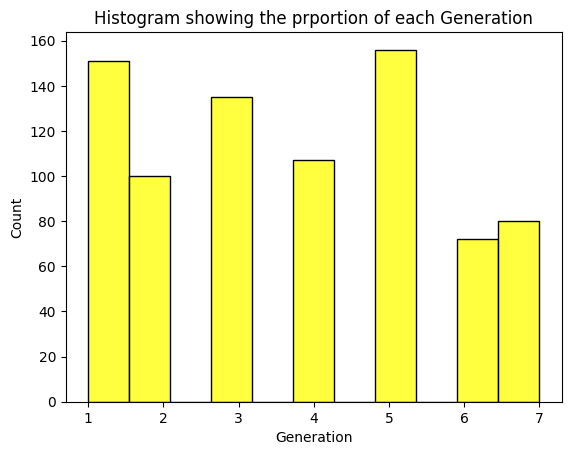

In [22]:
sns.histplot(df['Generation'], color='yellow')
plt.title('Histogram showing the prportion of each Generation')
plt.show()

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


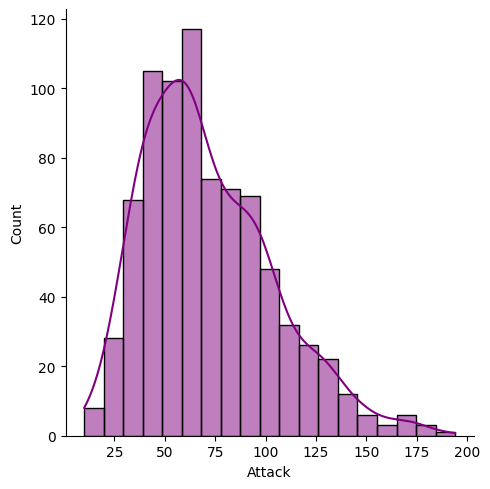

In [45]:
sns.displot(x = df['Attack'], kde=True, color='purple')

In [53]:
#df['Atack'] is almost normally distributed

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


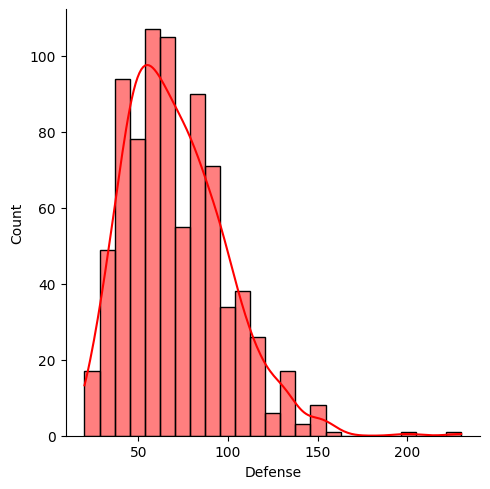

In [52]:
sns.displot(x = df['Defense'], kde=True, color='red')

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


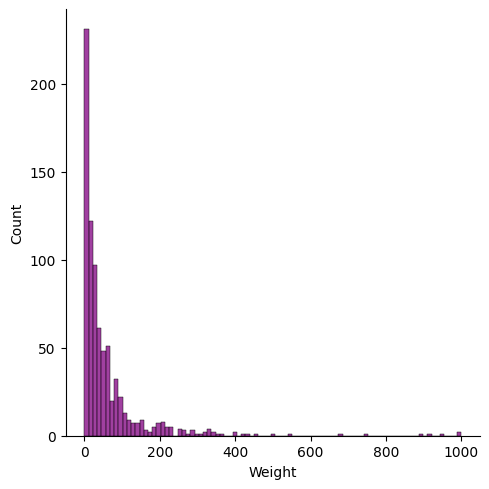

In [49]:
sns.displot(x = df['Weight'], color='purple')

In [23]:
# proportion of True and False in df['Legendary']
group_by_legendary = df.groupby('Legendary')['Name'].agg('count')
group_by_legendary

Legendary
False    748
True      53
Name: Name, dtype: int64

In [24]:
# correlation between features
corr = df.drop(['Name','Type1', 'Type2'], axis=1).corr()
corr

,percentage_male,Attack,Defense,Speed,Weight,Generation,Legendary
percentage_male,1.000000,0.088097,0.008499,0.051227,0.027284,-0.013774,0.016922
Attack,0.088097,1.000000,0.511496,0.438981,0.240862,0.070146,0.331909
Defense,0.008499,0.511496,1.000000,0.225977,0.303386,0.048711,0.276020
Speed,0.051227,0.438981,0.225977,1.000000,0.050731,-0.019914,0.261861
Weight,0.027284,0.240862,0.303386,0.050731,1.000000,0.083597,0.387169
Generation,-0.013774,0.070146,0.048711,-0.019914,0.083597,1.000000,0.183300
Legendary,0.016922,0.331909,0.276020,0.261861,0.387169,0.183300,1.000000


In [25]:
# Let's perform statistical aggregation of the dataset
aggregated_stats = df.groupby('Type1').agg({'Attack' : ['mean', 'median', 'std'],
                                           'Defense' :  ['mean', 'median', 'std'],
                                           'Speed' :  ['mean', 'median', 'std']})
# to flatten the hierarchical columns
aggregated_stats.columns = ['_'.join(col).strip() for col in aggregated_stats.columns.values]

# Display resulting dataframe
aggregated_stats

,Attack_mean,Attack_median,Attack_std,Defense_mean,Defense_median,Defense_std,Speed_mean,Speed_median,Speed_std
Type1,,,,,,,,,
bug,56.652778,51.5,30.608459,62.513889,55.5,31.621437,63.569444,58.5,35.060843
dark,74.517241,65.0,33.924939,69.068966,65.0,25.701488,75.310345,70.0,28.766428
dragon,89.592593,83.0,44.080572,84.555556,90.0,32.361341,76.111111,80.0,23.651855
electric,87.538462,81.0,34.118868,70.051282,73.0,20.903222,85.410256,95.0,29.007003
fairy,81.500000,81.0,29.744500,87.777778,84.0,30.965931,53.666667,47.0,27.377535
fighting,50.107143,40.0,24.989389,63.428571,60.0,22.453951,64.285714,60.0,25.480359
fire,87.730769,83.0,28.247586,71.538462,66.0,23.200289,73.346154,72.5,25.177709
flying,84.000000,97.0,34.394767,70.000000,80.0,26.457513,99.666667,121.0,38.695392
ghost,82.444444,85.0,31.565967,78.296296,82.0,27.350735,58.333333,54.0,29.947390


In [26]:
# Let's transform Legendary
# Encode the last column to bear 1 for true and 0 for false
categorical_feature = df['Legendary']
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
ohe = LabelEncoder()
df['Legendary'] = df['Legendary'].values
df['Legendary'] = ohe.fit_transform(categorical_feature)

In [27]:
df.head()

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
0,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
2,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
3,Charmander,88.1,60,50,65,fire,flying,8.5,1,0
4,Charmeleon,88.1,80,65,80,fire,flying,19.0,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             801 non-null    object 
 1   percentage_male  801 non-null    float64
 2   Attack           801 non-null    int64  
 3   Defense          801 non-null    int64  
 4   Speed            801 non-null    int64  
 5   Type1            801 non-null    object 
 6   Type2            801 non-null    object 
 7   Weight           801 non-null    float64
 8   Generation       801 non-null    int64  
 9   Legendary        801 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 62.7+ KB


In [29]:
# Lets transform this text feature
text_features = df.select_dtypes(include=['object']).columns
text_data = df[text_features]

text_transformer = OneHotEncoder(handle_unknown='ignore')

# identify all columns with dtype 'oject'
transformed_text_data = text_transformer.fit_transform(text_data).toarray()
feature_names = text_transformer.get_feature_names_out(text_features)
transformed_text_df = pd.DataFrame(transformed_text_data, columns = feature_names)
final_df = pd.DataFrame(transformed_text_df)
final_df

,Name_Abomasnow,Name_Abra,Name_Absol,Name_Accelgor,Name_Aegislash,Name_Aerodactyl,Name_Aggron,Name_Aipom,Name_Alakazam,Name_Alomomola,...,Type2_ghost,Type2_grass,Type2_ground,Type2_ice,Type2_normal,Type2_poison,Type2_psychic,Type2_rock,Type2_steel,Type2_water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# transform the numerical features
numerical_data =  df[['percentage_male', 'Speed', 'Defense', 'Weight']]
numerical_transformer = StandardScaler()
transformed_numerical_data = numerical_transformer.fit_transform(numerical_data)

# convert to dataframe
transformed_numerical_data = pd.DataFrame(transformed_numerical_data, columns= ['percentage_male', 'Speed', 'Defense', 'Weight'])

In [31]:
# Let's transform the numerical features, then combine them together
features = final_df = pd.concat([transformed_text_df, transformed_numerical_data ], axis=1)
features

,Name_Abomasnow,Name_Abra,Name_Absol,Name_Accelgor,Name_Aegislash,Name_Aerodactyl,Name_Aggron,Name_Aipom,Name_Alakazam,Name_Alomomola,...,Type2_normal,Type2_poison,Type2_psychic,Type2_rock,Type2_steel,Type2_water,percentage_male,Speed,Defense,Weight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.736813e+00,-0.738486,-0.211687,-0.504839
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.736813e+00,-0.219268,0.325465,-0.448312
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.736813e+00,0.473022,1.757871,0.357903
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.736813e+00,-0.046196,-0.748839,-0.490012
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.736813e+00,0.473022,-0.211687,-0.392711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-3.745965e-16,-0.184654,1.077478,8.697124
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-3.745965e-16,1.476843,-1.429231,-0.567854
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-3.745965e-16,-0.807715,-0.641408,7.660165
799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-3.745965e-16,0.438407,0.647757,1.562591


In [32]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [63]:
X = features
y = df['Legendary']

# SPlit the data into teraining and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121)
print('Feature Size :', X_train.shape)
print('Label_shape :', y_test.shape)

Feature Size : (600, 841)
Label_shape : (201,)


# Applying a Model

I will use RandomForest

In [64]:
# train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# make predictions on the test set
y_pred = model.predict(X_test)

In [68]:
# Evaluate the accuracy
accuracy = accuracy_score(y_pred, y_test)
print(f'Model Accuracy: {accuracy:.2%}') # accuracy of 94% means the model do alright, it's not too bad

Model Accuracy: 94.03%
